# Exploratory Data Analysis: Haberman's Dataset

#### ***Haberman's Dataset contains the data of the Breast Cancer Patients who had undergone Surgery.***

***Import Packages***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\AMA\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


***Load in dataset and call it haberman_data***

ensure you pass in the parameter header

In [2]:
df = pd.read_csv("datasets_474_966_haberman.csv", names=[0,1,2,3]) #header=[0])

***Check out head of data***

In [3]:
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


***Rename Column***

age = Age of patient

op_yr = Operation year;

ax = Number of Axil Nodes that are detected;

status = Survival Status of the patient after 5 years

In [4]:
cols = ["age", "op_yr", "ax", "status"]
df.columns = cols

In [5]:
df.head()

,age,op_yr,ax,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


***shape of the dataset***

In [6]:
df.shape

(306, 4)

***Check out the status column and see how it is classified***

In [7]:
status = list(df["status"].value_counts())
status

[225, 81]

***Replace the status values***

1 == Survived

2 == Not_survived

In [8]:
df["status"] = df["status"].map({1: "Survived", 2:"Not_survived"})

***Print out the percentage of data classified***

In [9]:
s_sum = df["status"].count()

In [10]:
print("The percentage of patient that survived the surgery {}%".format(round(status[0]/s_sum*100,2)))
print("The percentage of patient that survived the surgery {}%".format(round(status[1]/s_sum*100,2)))

The percentage of patient that survived the surgery 73.53%
The percentage of patient that survived the surgery 26.47%


***Observation:***
input your observation below

* About 3 out of every 4 patients Survived
* about 74% survived while only 26% did not survive.

***Check the description of the data***

In [11]:
df.describe()

,age,op_yr,ax
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


***Observation:*** input your observation below

* There appear to be no missing values or outliers
* Age: 30 to 83,
* Op_yr: 1958 to 1969, 
* Ax: 0 to 52.

# Univariate Analysis :

### Histogram

***Reproduce the following Figures***

Text(0.5,0,'Age of Patient')

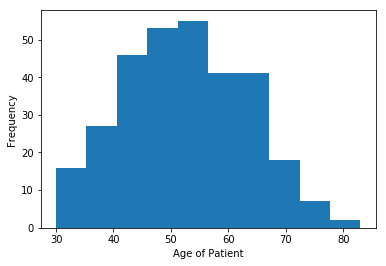

In [12]:
df["age"].plot(kind="hist")
plt.xlabel("Age of Patient")

In [13]:
df.head()

,age,op_yr,ax,status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


***Hint: Use seaborn FacetGrid***

In [14]:
Survived = df.loc[df["status"]=="Survived"]
Not_Survived = df.loc[df["status"]=="Not_survived"]

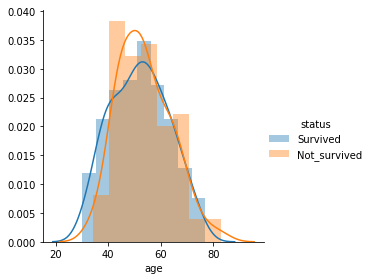

In [15]:
sns.FacetGrid(df, hue="status", height=4).map(sns.distplot, "age").add_legend()

***Observation:*** input your observation below

* There are no outliers, the people affected are majorly between the ages of 40 and 60
* Most people btw 40 to 45 did not survive the operation

***Reproduce this figures***

Text(0.5,0,'Year of Operation')

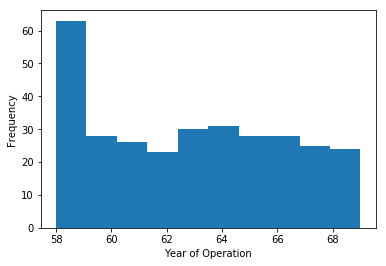

In [16]:
df["op_yr"].plot(kind="hist")
plt.xlabel("Year of Operation")

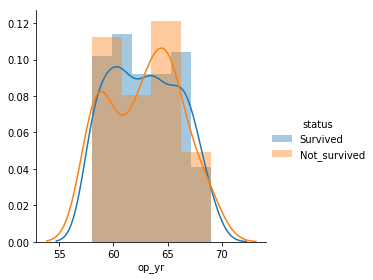

In [17]:
sns.FacetGrid(df, hue="status", height=4).map(sns.distplot, "op_yr").add_legend()

***Hint: Use seaborn FacetGrid***

***Observation:*** input your observation below

* Patient with age between 40 and 55 are more
* More people with Age less 40 will survive(where the not_sur col. exceed surv_col
* People often survive after the year 1960

***Reproduce the following figures***

Text(0.5,0,'Axil Nodes')

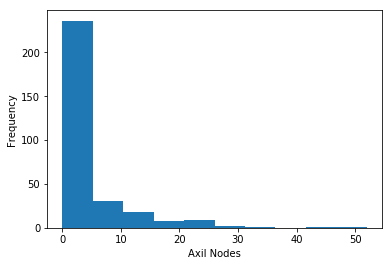

In [18]:
df["ax"].plot(kind="hist")
plt.xlabel("Axil Nodes")

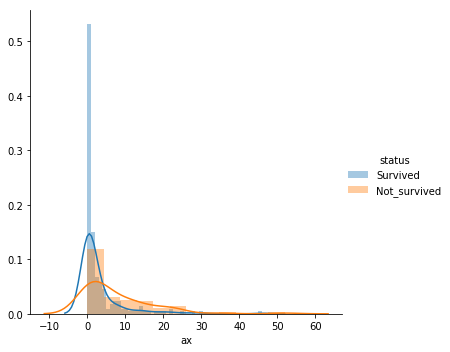

In [19]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "ax").add_legend()

***Observation:*** input your observation below

* Most patient has about 0 to 5 axil nodes.
* Most of which has a better chance of surviving

# Probability Density Function & Commulative Density Function

## Read Through

***Segregate the data based on the Class Label i.e. Survival Status***

In [20]:
haberman_data_Survived = df.loc[df["status"]=="Survived"]
haberman_data_Not_Survived = df.loc[df["status"]=="Not_survived"]

***Plotting the PDF,CDF for Age of Patient for the above Segregated Data***

In [21]:
density_age_survived, bin_edges_age_survived=np.histogram(
    haberman_data_Survived['age'],
    bins=10,
    density=True)

pdf_age_survived = (density_age_survived)/(sum(density_age_survived))

In [22]:
density_Age_Not_Survived, bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data_Not_Survived['age'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [23]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

PDF Survived : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]

Bin Edges Not Survived :[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

PDF Not Survived : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]



In [24]:
cdf_Age_Not_Survived = np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived = np.cumsum(pdf_age_survived)

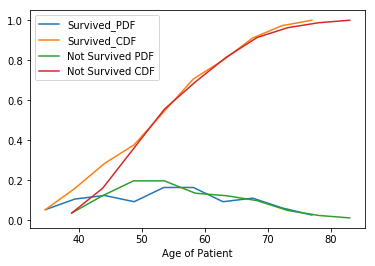

In [25]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Age of Patient')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :***

* The chance of surviving is below the age of 40
* Similarly the chances of not surviving increases after the age 40 years.

### To Do 👇

***Plotting the PDF,CDF for Year of Operation for the above Segregated Data***

In [26]:
df["op_yr"].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: op_yr, dtype: int64

In [27]:
#s- survived
#ns- not survived?
density_op_s, bin_edges_op_s = np.histogram(
    haberman_data_Survived['op_yr'],
    bins=10,
    density=True)

pdf_op_s = (density_op_s)/(sum(density_op_s))

In [28]:
density_op_ns, bin_edges_op_ns = np.histogram(
    haberman_data_Not_Survived['op_yr'],
    bins=10,
    density=True)

pdf_op_ns = (density_op_ns)/(sum(density_op_ns))

In [29]:
print("Bin Edges Survived : {}\n".format(bin_edges_op_s))
print("PDF Survived : {}\n".format(pdf_op_s))
print("Bin Edges Not Survived :{}\n".format(bin_edges_op_ns))
print("PDF Not Survived : {}\n".format(pdf_op_ns))

Bin Edges Survived : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Survived : [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]

Bin Edges Not Survived :[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Not Survived : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]



In [30]:
cdf_op_ns=np.cumsum(pdf_op_ns)
cdf_op_s=np.cumsum(pdf_op_s)

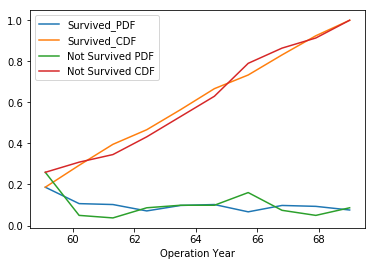

In [31]:
plt.plot(bin_edges_op_s[1:],pdf_op_s)
plt.plot(bin_edges_op_s[1:],cdf_op_s)
plt.plot(bin_edges_op_ns[1:],pdf_op_ns)
plt.plot(bin_edges_op_ns[1:],cdf_op_ns)
plt.xlabel('Operation Year')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :*** Input your answer below

* There is continuous rise in rate of survival as the year increases
* Likewise, the chance of not surviving drops

***Plotting the PDF,CDF for Axil Nodes for the above Segregated Data***

In [32]:
df["ax"].unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

In [33]:
#s- survived
#ns- not survived?
density_ax_s, bin_edges_ax_s = np.histogram(
    haberman_data_Survived['ax'],
    bins=10,
    density=True)

pdf_ax_s = (density_ax_s)/(sum(density_ax_s))

In [34]:
density_ax_ns, bin_edges_ax_ns = np.histogram(
    haberman_data_Not_Survived['ax'],
    bins=10,
    density=True)

pdf_ax_ns = (density_ax_ns)/(sum(density_ax_ns))

In [35]:
print("Bin Edges Survived : {}\n".format(bin_edges_ax_s))
print("PDF Survived : {}\n".format(pdf_ax_s))
print("Bin Edges Not Survived :{}\n".format(bin_edges_ax_ns))
print("PDF Not Survived : {}\n".format(pdf_ax_ns))

Bin Edges Survived : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

PDF Survived : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

Bin Edges Not Survived :[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

PDF Not Survived : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]



In [36]:
cdf_ax_ns=np.cumsum(pdf_ax_ns)
cdf_ax_s=np.cumsum(pdf_ax_s)

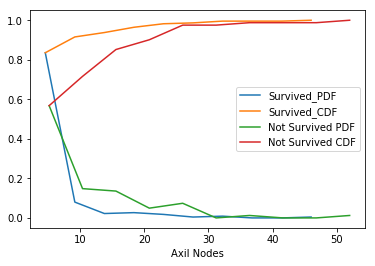

In [37]:
plt.plot(bin_edges_ax_s[1:],pdf_ax_s)
plt.plot(bin_edges_ax_s[1:],cdf_ax_s)
plt.plot(bin_edges_ax_ns[1:],pdf_ax_ns)
plt.plot(bin_edges_ax_ns[1:],cdf_ax_ns)
plt.xlabel('Axil Nodes')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :*** Input your answer below

* The chance of surviving drops after about 5 axil nodes.
* Chances of not surviving increase as axil node increases.

## Box Plot

***Reproduce the following Images***

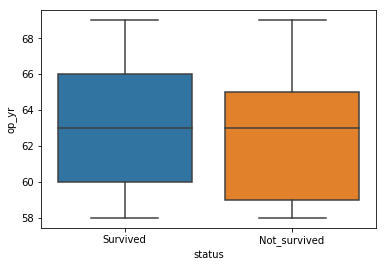

In [38]:
sns.boxplot(df["status"], df["op_yr"])

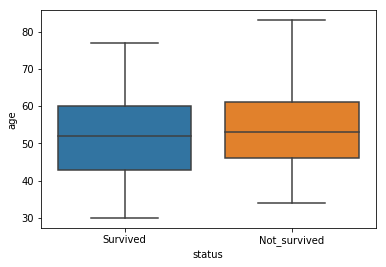

In [39]:
sns.boxplot(df["status"], df["age"])

***Observation :*** Input Your answer below

* Many more people survived after the year 1963, probably because of advancement in technology.
* More patients with lesser age has better chance of surviving.

In [40]:
Survived.count()

age       225
op_yr     225
ax        225
status    225
dtype: int64

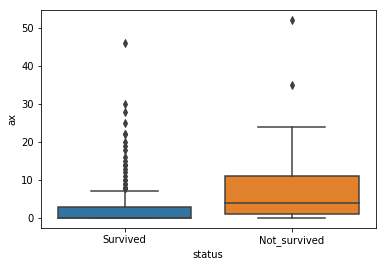

In [41]:
sns.boxplot(df["status"], df["ax"])

***Observation :*** Input Your answer below

* Large number of axils indicates lower chance of surviving.
* 

## Violin Plots

***Reproduce the following images***

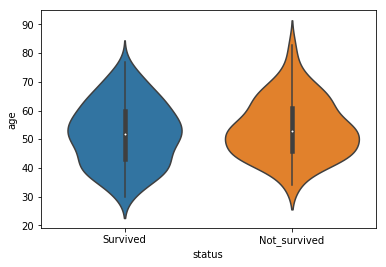

In [42]:
sns.violinplot(x=df["status"], y=df["age"])

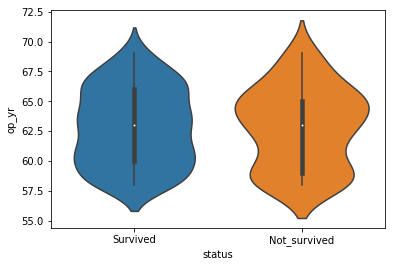

In [43]:
sns.violinplot(x=df["status"], y=df["op_yr"])

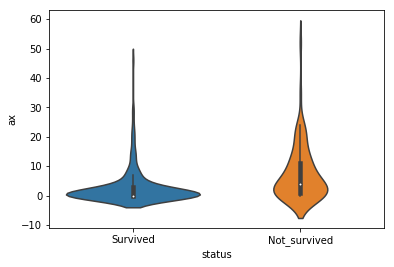

In [44]:
sns.violinplot(x=df["status"], y=df["ax"])

***Observation :*** Input your answer below

* 
* 

# Bivariate Analysis

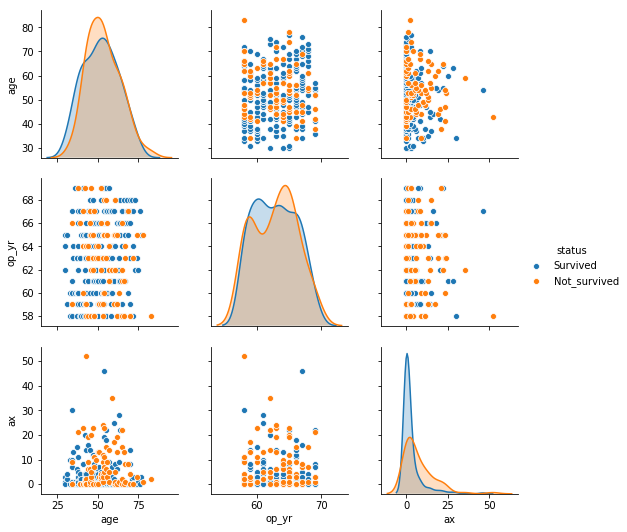

In [45]:
sns.pairplot(df, hue="status")

***Hint: Use FacetGrid***

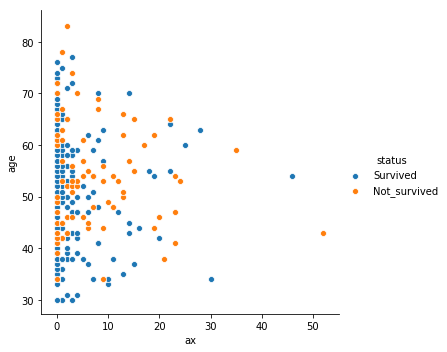

In [46]:
sns.FacetGrid(df, hue="status", height=5).map(sns.scatterplot, "ax", "age").add_legend()

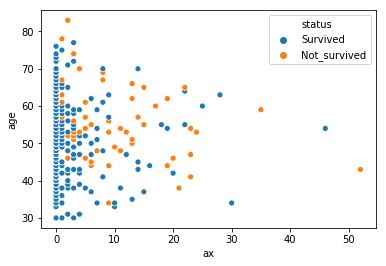

In [47]:
sns.scatterplot(x =df["ax"], y = df["age"], hue=df["status"])

***Observation :*** Input your answer below

* 
* 

In [54]:
Survived = df.loc[df["status"]=="Survived"]
Not_Survived = df.loc[df["status"]=="Not_survived"]

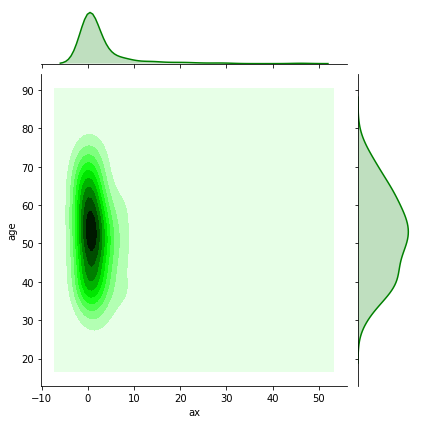

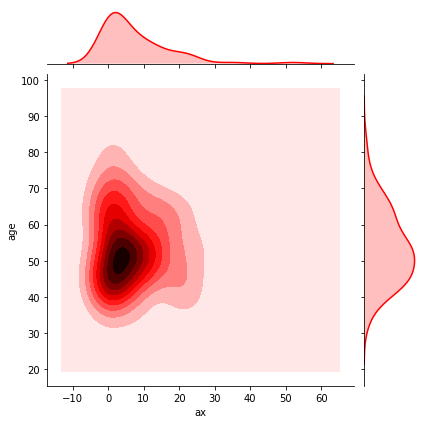

In [55]:
sns.jointplot(x="ax", y="age", data=Survived, kind="kde", color="g")
sns.jointplot(x="ax", y="age", data=Not_Survived, kind="kde", color="r")

***Observation :*** Input your answer below

* Patients with 0 axils no matter their age has a chance of surviving.
* Patient with about 50 years old with less than 5 axil nodes were more.
* 

# Great Job!!!

***Final Conclusions :***

* Haberman's Dataset is Imbalanced Dataset and 73.5% of the patients have survived after the surgery.
* Age of patients is in the range of 30 to 83.
* Operation's are performed during the period 1958-1969.
* The minimum number of Axil Nodes is 0 and maximum is 52 with a mean of 4 axil nodes and 75% patients have less than 5 Axil Nodes.
* Patients aged between 40 and 55 are more in number.
* Patients with age less than 40 years have more chances of survival.
* Major concentration of the patients are having less than 5 Positively detected Axil Nodes.
* Patients having less than 5 Positively Detected Axil Nodes have the highest survival rate (~82%).
* Exact inferences can't be drawn from the above plots.As this is Imbalanced dataset and all the parameters are overlapped, by considering only one parameter we can't infer correctly. The combination of parameters under conditions can infer better.
* Number of Positively Detected Axil Nodes and Age of Patient are the two important parameters, which when combinedly used under conditions can infer better in building a model.